# Task 1 - predict real estate price

- Predict house price using linear regression model from `sklearn`
- Extract target variable `y` - under `unit_area_price` column
- Separate test set (30%) `X_train, X_test, y_train, y_test` using `train_test_split` from `sklearn.model_selection`
- use `StandardScaler` (method `fit_transform` and `fit`) to scale the data
- train and score the model using R2 score
- plot Actual vs Predicted scatter plot
- display trained model coefficients for each variable to visualize feature importance.

Data Description:

The inputs are as follows
- transaction_date = the transaction date (for example, 2013.250=2013 March, 2013.500=2013 June, etc.)
- house_age = the house age (unit: year)
- nearest_mass_rapid_transit_station_distance = the distance to the nearest MRT station (unit: meter)
- convenience_stores_cnt = the number of convenience stores in the living circle on foot (integer)
- latitude = the geographic coordinate, latitude. (unit: degree)
- longitude = the geographic coordinate, longitude. (unit: degree)

The output is as follow
- unit_area_price = house price of unit area (10000 New Taiwan Dollar/Ping, where Ping is a local unit, 1 Ping = 3.3 meter squared)



In [1]:
import pandas as pd
url = "https://gist.githubusercontent.com/SaxMan96/044536b0517b98aab0a9d8171a10ec58/raw/77a07715c7fe727c0c0f7567756530a9c49b73c2/real_estate.csv"
df = pd.read_csv(url, index_col=0)

In [2]:
y = df['unit_area_price']
X = df.drop(columns=['unit_area_price']).copy()

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=7)

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [5]:
model.score(X_train, y_train)

0.5857758363927127

In [6]:
model.score(X_test, y_test)

0.5625892618223882

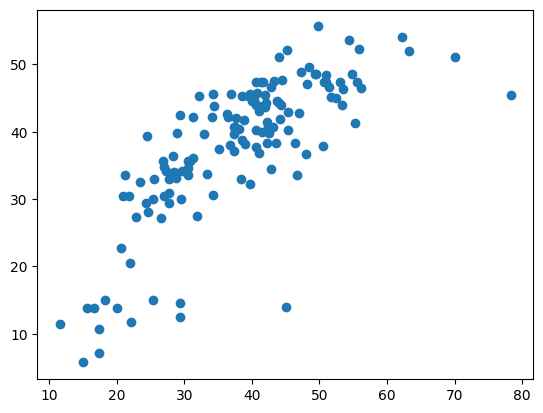

In [7]:
import matplotlib.pyplot as plt

plt.scatter(x=y_test, y=model.predict(X_test))
plt.show()

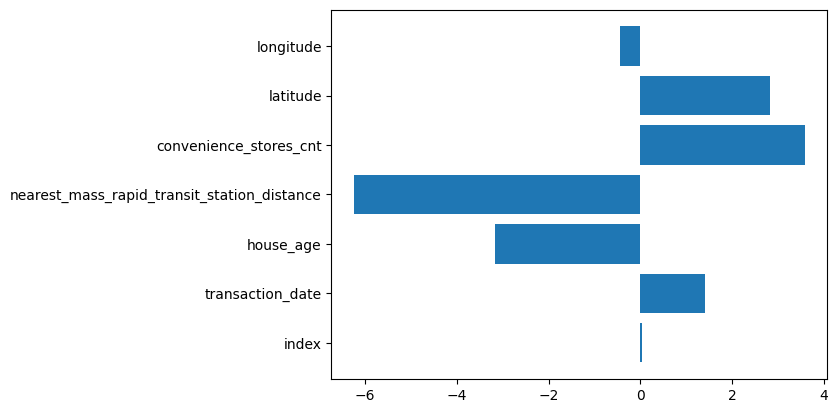

In [8]:
plt.barh(width=model.coef_, y=X.columns);

# (extra) Plot on Map

In [9]:
import folium
import matplotlib.cm as cm
from matplotlib.colors import Normalize
from matplotlib.colors import rgb2hex

cmap = cm.magma
norm = Normalize(vmin=10, vmax=70)

def plot_point(point):
    rgb = cmap(norm(point.unit_area_price))
    hex_color = rgb2hex(rgb)
    folium.CircleMarker(
        location=[point.latitude, point.longitude],
        fill=True,
        weight=4,
        radius=5,
        color=hex_color,
        tooltip=f"""
            House Age: {int(point.house_age)}<br>
            Price/Unit: {point.unit_area_price}$<br>
            Stores Cnt: {int(point.convenience_stores_cnt)}<br>
            Station dist: {int(point.nearest_mass_rapid_transit_station_distance)}m
        """
    ).add_to(folium_map)

    
folium_map = folium.Map(prefer_canvas=True)
df.apply(plot_point, axis=1)
folium_map.fit_bounds(folium_map.get_bounds())
folium_map